In [1]:
import pandas as pd
import warnings
import re

In [2]:
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv(r'/kaggle/input/final-datathon/Datathon_TrainData_org.csv')

In [4]:
dft=pd.read_csv(r'/kaggle/input/test1/TestData_org.csv')

In [5]:
summary=df.info()
print(summary)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1617 entries, 0 to 1616
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Country               1614 non-null   object
 1   Date                  1614 non-null   object
 2   Speaker               1613 non-null   object
 3   Headline              1612 non-null   object
 4   Text_of_Speech        1611 non-null   object
 5   Designation           1605 non-null   object
 6   Running President/PM  1605 non-null   object
 7   Speech Link           1605 non-null   object
 8   Emotion               1605 non-null   object
 9   Context               1605 non-null   object
dtypes: object(10)
memory usage: 126.5+ KB
None


# dropping unwanted rows

In [6]:
dft = dft.drop(columns=['Unnamed: 8'])

In [7]:
dft

,Country,Date,Speaker,Headline,Text_of_Speech,Designation,Running President/PM,Speech Link,Context
0,USA,20-11-2013,Barack Obama,\nRemarks by the President at the 50th Anniver...,"Good evening, everybody. Please have a seat. ...",President,Barack Obama,https://obamawhitehouse.archives.gov/the-press...,NATIONALISM
1,Russia,31-03-2010,Dmitry Medvedev,Dmitry Medvedev met with the Security Council ...,"Colleagues, we are meeting out of schedule tod...",President,Dmitry Medvedev,http://en.kremlin.ru/events/president/transcri...,EXTREMISM
2,USA,25-07-2015,Barack Obama,\nRemarks by the President During Visit to Pow...,"Now, one other thing I want to point out -- so...",President,Barack Obama,https://obamawhitehouse.archives.gov/the-press...,DEVELOPMENT
3,USA,15-07-2016,Barack Obama,\nRemarks by the President at Diplomatic Corps...,"Good afternoon, everyone. I just had the oppo...",President,Barack Obama,https://obamawhitehouse.archives.gov/the-press...,INTERNATIONAL AFFAIRS
4,USA,18-11-2014,Barack Obama,\nRemarks by the President Before Meeting with...,"Well, I’ve got my team here to talk about Ebo...",President,Barack Obama,https://obamawhitehouse.archives.gov/the-press...,INTERNATIONAL AFFAIRS
...,...,...,...,...,...,...,...,...,...
397,USA,28-11-2018 00:00,Donald Trump,Remarks by President Trump at the National Chr...,THE PRESIDENT: Thank you. Thank you very muc...,President,Donald Trump,https://trumpwhitehouse.archives.gov/briefings...,OTHERS
398,Russia,24-03-2006,Vladimir Putin,Opening Remarks at the State Council Meeting o...,"Good afternoon, dear colleagues,\n\nToday we a...",President,Vladimir Putin,http://en.kremlin.ru/events/president/transcri...,DEVELOPMENT
399,Russia,19-07-2018,Vladimir Putin,Meeting of ambassadors and permanent represent...,"Colleagues, welcome to this traditional meetin...",President,Vladimir Putin,http://en.kremlin.ru/events/president/transcri...,INTERNATIONAL AFFAIRS
400,USA,22-06-2013,Barack Obama,\nWeekly Address: Time for Congress to Pass Co...,"Hi everybody. Right now, the United States S...",President,Barack Obama,https://obamawhitehouse.archives.gov/the-press...,DEVELOPMENT


# checking null count in each column in df

In [8]:
null_counts = df.isnull().sum()
print("Null counts for each column:")
print(null_counts)

Null counts for each column:
Country                  3
Date                     3
Speaker                  4
Headline                 5
Text_of_Speech           6
Designation             12
Running President/PM    12
Speech Link             12
Emotion                 12
Context                 12
dtype: int64


# labels cleaning

In [9]:
df['Emotion'].isnull().sum()

12

In [10]:
labels=df['Emotion'].unique()

In [11]:
labels

array(['UPSET', 'OPTIMISM', 'NEUTRAL', 'JOY', nan], dtype=object)

In [12]:
df= df.dropna(subset=['Emotion'])

In [13]:
labels=df['Emotion'].unique()

In [14]:
labels

array(['UPSET', 'OPTIMISM', 'NEUTRAL', 'JOY'], dtype=object)

In [15]:
df['Emotion'].isnull().sum()

0

# encode labels

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
label_encoder = LabelEncoder()
df['Emotion'] = label_encoder.fit_transform(df['Emotion'])

In [18]:
df

,Country,Date,Speaker,Headline,Text_of_Speech,Designation,Running President/PM,Speech Link,Emotion,Context
0,Russia,24-01-2000,Vladimir Putin,Speech at a conference of the heads of republi...,"Esteemed Mr Lebedev,\n\nLadies and Gentlemen:\...",President,Vladimir Putin,http://en.kremlin.ru/events/president/transcri...,3,OTHERS
1,USA,09-09-2021 00:00,Joe Biden,Remarks by President Biden on Fighting the COV...,"THE PRESIDENT: Good evening, my fellow Americ...",President,Joe Biden,https://www.whitehouse.gov/briefing-room/speec...,2,DEVELOPMENT
2,Russia,24-12-2004,Vladimir Putin,Excerpts from the Opening Speech at a Session ...,"Good afternoon, dear colleagues,\n\nOur meetin...",President,Vladimir Putin,http://en.kremlin.ru/events/president/transcri...,1,DEVELOPMENT
3,USA,14-08-2014,Barack Obama,\nStatement by the President,"Good afternoon, everybody. This sound system i...",President,Barack Obama,https://obamawhitehouse.archives.gov/the-press...,1,INTERNATIONAL AFFAIRS
4,USA,26-03-2021 00:00,Joe Biden,Statement by President Biden on the Attack on ...,More Americans voted in the 2020 elections tha...,President,Joe Biden,https://www.whitehouse.gov/briefing-room/speec...,3,OTHERS
...,...,...,...,...,...,...,...,...,...,...
1612,United Kingdom,24-Jul-19,Boris Johnson,Boris Johnson's first speech as Prime Minister...,Good afternoon I have just been to see Her Maj...,Prime Minister,Boris Johnson,https://www.gov.uk/government/speeches/boris-j...,2,DEVELOPMENT
1613,USA,01-02-2021 00:00,Joe Biden,Statement by President Joe Biden On Black Hist...,"This February, during Black History Month, I c...",President,Joe Biden,https://www.whitehouse.gov/briefing-room/state...,2,OTHERS
1614,USA,30-09-2015,Barack Obama,\nRemarks by the President Meeting with State ...,Thank you so much. Everybody have a seat. We...,President,Barack Obama,https://obamawhitehouse.archives.gov/the-press...,1,NATIONALISM
1615,China,23-06-2021 00:00,H.E. Wang Yi,Let Us Strengthen Confidence and Solidarity an...,"Colleagues,\nFriends,\n\nIn 2013, President Xi...",State Councilor and Foreign Minister of the Pe...,Xi Jinping,https://www.fmprc.gov.cn/mfa_eng/wjdt_665385/z...,0,DEVELOPMENT


# text null values

In [19]:
df[df['Text_of_Speech']=="NaN"].isnull().sum()

Country                 0.0
Date                    0.0
Speaker                 0.0
Headline                0.0
Text_of_Speech          0.0
Designation             0.0
Running President/PM    0.0
Speech Link             0.0
Emotion                 0.0
Context                 0.0
dtype: float64

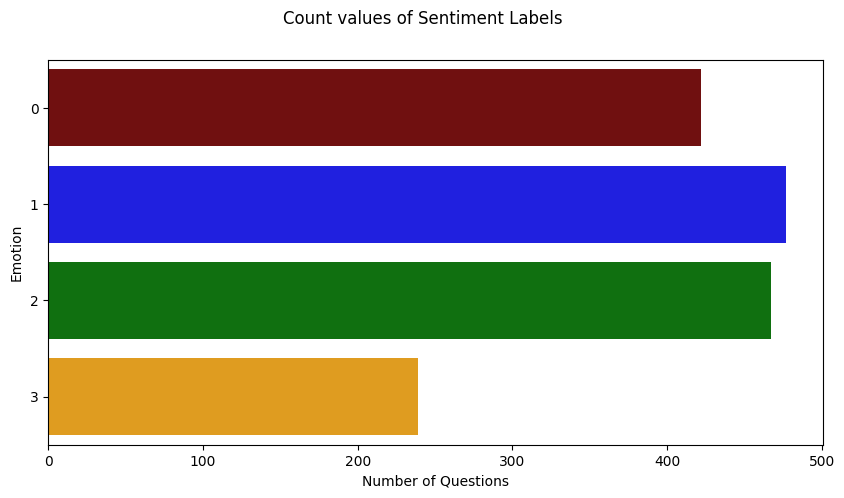

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import countplot
from matplotlib.pyplot import suptitle
%matplotlib inline
# Create the count plot
plt.figure(figsize=(10, 5))
sns.countplot(y="Emotion", palette=['maroon', 'blue', 'green', 'orange'], data=df)
plt.suptitle("Count values of Sentiment Labels")
plt.xlabel("Number of Questions")
plt.show()

# preprocessing of Text_of_Speech

# convert to lower

In [21]:
def lower(x):
    return x.lower()
df['Text_of_Speech']=df['Text_of_Speech'].apply(lower)   
dft['Text_of_Speech']=dft['Text_of_Speech'].apply(lower)

In [22]:
dft

,Country,Date,Speaker,Headline,Text_of_Speech,Designation,Running President/PM,Speech Link,Context
0,USA,20-11-2013,Barack Obama,\nRemarks by the President at the 50th Anniver...,"good evening, everybody. please have a seat. ...",President,Barack Obama,https://obamawhitehouse.archives.gov/the-press...,NATIONALISM
1,Russia,31-03-2010,Dmitry Medvedev,Dmitry Medvedev met with the Security Council ...,"colleagues, we are meeting out of schedule tod...",President,Dmitry Medvedev,http://en.kremlin.ru/events/president/transcri...,EXTREMISM
2,USA,25-07-2015,Barack Obama,\nRemarks by the President During Visit to Pow...,"now, one other thing i want to point out -- so...",President,Barack Obama,https://obamawhitehouse.archives.gov/the-press...,DEVELOPMENT
3,USA,15-07-2016,Barack Obama,\nRemarks by the President at Diplomatic Corps...,"good afternoon, everyone. i just had the oppo...",President,Barack Obama,https://obamawhitehouse.archives.gov/the-press...,INTERNATIONAL AFFAIRS
4,USA,18-11-2014,Barack Obama,\nRemarks by the President Before Meeting with...,"well, i’ve got my team here to talk about ebo...",President,Barack Obama,https://obamawhitehouse.archives.gov/the-press...,INTERNATIONAL AFFAIRS
...,...,...,...,...,...,...,...,...,...
397,USA,28-11-2018 00:00,Donald Trump,Remarks by President Trump at the National Chr...,the president: thank you. thank you very muc...,President,Donald Trump,https://trumpwhitehouse.archives.gov/briefings...,OTHERS
398,Russia,24-03-2006,Vladimir Putin,Opening Remarks at the State Council Meeting o...,"good afternoon, dear colleagues,\n\ntoday we a...",President,Vladimir Putin,http://en.kremlin.ru/events/president/transcri...,DEVELOPMENT
399,Russia,19-07-2018,Vladimir Putin,Meeting of ambassadors and permanent represent...,"colleagues, welcome to this traditional meetin...",President,Vladimir Putin,http://en.kremlin.ru/events/president/transcri...,INTERNATIONAL AFFAIRS
400,USA,22-06-2013,Barack Obama,\nWeekly Address: Time for Congress to Pass Co...,"hi everybody. right now, the united states s...",President,Barack Obama,https://obamawhitehouse.archives.gov/the-press...,DEVELOPMENT


# replace emojis with words if present

In [24]:
pip install emot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 kB 3.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [25]:
from emot.emo_unicode import UNICODE_EMOJI
# Function for converting emojis into word
def convert_emojis(text):
    for emot in UNICODE_EMOJI:
        text = text.replace(emot, "_".join(UNICODE_EMOJI[emot].replace(",","").replace(":","").split()))
    return text  
df['Text_of_Speech'] = df['Text_of_Speech'].apply(convert_emojis)
dft['Text_of_Speech'] = dft['Text_of_Speech'].apply(convert_emojis)

In [26]:
dft

,Country,Date,Speaker,Headline,Text_of_Speech,Designation,Running President/PM,Speech Link,Context
0,USA,20-11-2013,Barack Obama,\nRemarks by the President at the 50th Anniver...,"good evening, everybody. please have a seat. ...",President,Barack Obama,https://obamawhitehouse.archives.gov/the-press...,NATIONALISM
1,Russia,31-03-2010,Dmitry Medvedev,Dmitry Medvedev met with the Security Council ...,"colleagues, we are meeting out of schedule tod...",President,Dmitry Medvedev,http://en.kremlin.ru/events/president/transcri...,EXTREMISM
2,USA,25-07-2015,Barack Obama,\nRemarks by the President During Visit to Pow...,"now, one other thing i want to point out -- so...",President,Barack Obama,https://obamawhitehouse.archives.gov/the-press...,DEVELOPMENT
3,USA,15-07-2016,Barack Obama,\nRemarks by the President at Diplomatic Corps...,"good afternoon, everyone. i just had the oppo...",President,Barack Obama,https://obamawhitehouse.archives.gov/the-press...,INTERNATIONAL AFFAIRS
4,USA,18-11-2014,Barack Obama,\nRemarks by the President Before Meeting with...,"well, i’ve got my team here to talk about ebo...",President,Barack Obama,https://obamawhitehouse.archives.gov/the-press...,INTERNATIONAL AFFAIRS
...,...,...,...,...,...,...,...,...,...
397,USA,28-11-2018 00:00,Donald Trump,Remarks by President Trump at the National Chr...,the president: thank you. thank you very muc...,President,Donald Trump,https://trumpwhitehouse.archives.gov/briefings...,OTHERS
398,Russia,24-03-2006,Vladimir Putin,Opening Remarks at the State Council Meeting o...,"good afternoon, dear colleagues,\n\ntoday we a...",President,Vladimir Putin,http://en.kremlin.ru/events/president/transcri...,DEVELOPMENT
399,Russia,19-07-2018,Vladimir Putin,Meeting of ambassadors and permanent represent...,"colleagues, welcome to this traditional meetin...",President,Vladimir Putin,http://en.kremlin.ru/events/president/transcri...,INTERNATIONAL AFFAIRS
400,USA,22-06-2013,Barack Obama,\nWeekly Address: Time for Congress to Pass Co...,"hi everybody. right now, the united states s...",President,Barack Obama,https://obamawhitehouse.archives.gov/the-press...,DEVELOPMENT


# tokenize

In [27]:
from nltk.tokenize import word_tokenize
def tokenize(x):
    return word_tokenize(x)
df['Text_of_Speech']=df['Text_of_Speech'].apply(tokenize)
dft['Text_of_Speech']=dft['Text_of_Speech'].apply(tokenize)

In [28]:
dft

,Country,Date,Speaker,Headline,Text_of_Speech,Designation,Running President/PM,Speech Link,Context
0,USA,20-11-2013,Barack Obama,\nRemarks by the President at the 50th Anniver...,"[good, evening, ,, everybody, ., please, have,...",President,Barack Obama,https://obamawhitehouse.archives.gov/the-press...,NATIONALISM
1,Russia,31-03-2010,Dmitry Medvedev,Dmitry Medvedev met with the Security Council ...,"[colleagues, ,, we, are, meeting, out, of, sch...",President,Dmitry Medvedev,http://en.kremlin.ru/events/president/transcri...,EXTREMISM
2,USA,25-07-2015,Barack Obama,\nRemarks by the President During Visit to Pow...,"[now, ,, one, other, thing, i, want, to, point...",President,Barack Obama,https://obamawhitehouse.archives.gov/the-press...,DEVELOPMENT
3,USA,15-07-2016,Barack Obama,\nRemarks by the President at Diplomatic Corps...,"[good, afternoon, ,, everyone, ., i, just, had...",President,Barack Obama,https://obamawhitehouse.archives.gov/the-press...,INTERNATIONAL AFFAIRS
4,USA,18-11-2014,Barack Obama,\nRemarks by the President Before Meeting with...,"[well, ,, i, ’, ve, got, my, team, here, to, t...",President,Barack Obama,https://obamawhitehouse.archives.gov/the-press...,INTERNATIONAL AFFAIRS
...,...,...,...,...,...,...,...,...,...
397,USA,28-11-2018 00:00,Donald Trump,Remarks by President Trump at the National Chr...,"[the, president, :, thank, you, ., thank, you,...",President,Donald Trump,https://trumpwhitehouse.archives.gov/briefings...,OTHERS
398,Russia,24-03-2006,Vladimir Putin,Opening Remarks at the State Council Meeting o...,"[good, afternoon, ,, dear, colleagues, ,, toda...",President,Vladimir Putin,http://en.kremlin.ru/events/president/transcri...,DEVELOPMENT
399,Russia,19-07-2018,Vladimir Putin,Meeting of ambassadors and permanent represent...,"[colleagues, ,, welcome, to, this, traditional...",President,Vladimir Putin,http://en.kremlin.ru/events/president/transcri...,INTERNATIONAL AFFAIRS
400,USA,22-06-2013,Barack Obama,\nWeekly Address: Time for Congress to Pass Co...,"[hi, everybody, ., right, now, ,, the, united,...",President,Barack Obama,https://obamawhitehouse.archives.gov/the-press...,DEVELOPMENT


# remove punctuations

In [30]:
def remove_punct(x):
    import string
    punct_tag=set(string.punctuation)
    t=[i for i in x if i not in punct_tag]
    return t
      
df['Text_of_Speech']=df['Text_of_Speech'].apply(remove_punct)
dft['Text_of_Speech']=dft['Text_of_Speech'].apply(remove_punct)

In [31]:
dft

,Country,Date,Speaker,Headline,Text_of_Speech,Designation,Running President/PM,Speech Link,Context
0,USA,20-11-2013,Barack Obama,\nRemarks by the President at the 50th Anniver...,"[good, evening, everybody, please, have, a, se...",President,Barack Obama,https://obamawhitehouse.archives.gov/the-press...,NATIONALISM
1,Russia,31-03-2010,Dmitry Medvedev,Dmitry Medvedev met with the Security Council ...,"[colleagues, we, are, meeting, out, of, schedu...",President,Dmitry Medvedev,http://en.kremlin.ru/events/president/transcri...,EXTREMISM
2,USA,25-07-2015,Barack Obama,\nRemarks by the President During Visit to Pow...,"[now, one, other, thing, i, want, to, point, o...",President,Barack Obama,https://obamawhitehouse.archives.gov/the-press...,DEVELOPMENT
3,USA,15-07-2016,Barack Obama,\nRemarks by the President at Diplomatic Corps...,"[good, afternoon, everyone, i, just, had, the,...",President,Barack Obama,https://obamawhitehouse.archives.gov/the-press...,INTERNATIONAL AFFAIRS
4,USA,18-11-2014,Barack Obama,\nRemarks by the President Before Meeting with...,"[well, i, ’, ve, got, my, team, here, to, talk...",President,Barack Obama,https://obamawhitehouse.archives.gov/the-press...,INTERNATIONAL AFFAIRS
...,...,...,...,...,...,...,...,...,...
397,USA,28-11-2018 00:00,Donald Trump,Remarks by President Trump at the National Chr...,"[the, president, thank, you, thank, you, very,...",President,Donald Trump,https://trumpwhitehouse.archives.gov/briefings...,OTHERS
398,Russia,24-03-2006,Vladimir Putin,Opening Remarks at the State Council Meeting o...,"[good, afternoon, dear, colleagues, today, we,...",President,Vladimir Putin,http://en.kremlin.ru/events/president/transcri...,DEVELOPMENT
399,Russia,19-07-2018,Vladimir Putin,Meeting of ambassadors and permanent represent...,"[colleagues, welcome, to, this, traditional, m...",President,Vladimir Putin,http://en.kremlin.ru/events/president/transcri...,INTERNATIONAL AFFAIRS
400,USA,22-06-2013,Barack Obama,\nWeekly Address: Time for Congress to Pass Co...,"[hi, everybody, right, now, the, united, state...",President,Barack Obama,https://obamawhitehouse.archives.gov/the-press...,DEVELOPMENT


# remove extra white spaces

In [32]:
def whites(x):
    w={' '}
    x=[i for i in x if i not in w]
    return x
df['Text_of_Speech']=df['Text_of_Speech'].apply(whites)    
dft['Text_of_Speech']=dft['Text_of_Speech'].apply(whites)    

In [33]:
dft

,Country,Date,Speaker,Headline,Text_of_Speech,Designation,Running President/PM,Speech Link,Context
0,USA,20-11-2013,Barack Obama,\nRemarks by the President at the 50th Anniver...,"[good, evening, everybody, please, have, a, se...",President,Barack Obama,https://obamawhitehouse.archives.gov/the-press...,NATIONALISM
1,Russia,31-03-2010,Dmitry Medvedev,Dmitry Medvedev met with the Security Council ...,"[colleagues, we, are, meeting, out, of, schedu...",President,Dmitry Medvedev,http://en.kremlin.ru/events/president/transcri...,EXTREMISM
2,USA,25-07-2015,Barack Obama,\nRemarks by the President During Visit to Pow...,"[now, one, other, thing, i, want, to, point, o...",President,Barack Obama,https://obamawhitehouse.archives.gov/the-press...,DEVELOPMENT
3,USA,15-07-2016,Barack Obama,\nRemarks by the President at Diplomatic Corps...,"[good, afternoon, everyone, i, just, had, the,...",President,Barack Obama,https://obamawhitehouse.archives.gov/the-press...,INTERNATIONAL AFFAIRS
4,USA,18-11-2014,Barack Obama,\nRemarks by the President Before Meeting with...,"[well, i, ’, ve, got, my, team, here, to, talk...",President,Barack Obama,https://obamawhitehouse.archives.gov/the-press...,INTERNATIONAL AFFAIRS
...,...,...,...,...,...,...,...,...,...
397,USA,28-11-2018 00:00,Donald Trump,Remarks by President Trump at the National Chr...,"[the, president, thank, you, thank, you, very,...",President,Donald Trump,https://trumpwhitehouse.archives.gov/briefings...,OTHERS
398,Russia,24-03-2006,Vladimir Putin,Opening Remarks at the State Council Meeting o...,"[good, afternoon, dear, colleagues, today, we,...",President,Vladimir Putin,http://en.kremlin.ru/events/president/transcri...,DEVELOPMENT
399,Russia,19-07-2018,Vladimir Putin,Meeting of ambassadors and permanent represent...,"[colleagues, welcome, to, this, traditional, m...",President,Vladimir Putin,http://en.kremlin.ru/events/president/transcri...,INTERNATIONAL AFFAIRS
400,USA,22-06-2013,Barack Obama,\nWeekly Address: Time for Congress to Pass Co...,"[hi, everybody, right, now, the, united, state...",President,Barack Obama,https://obamawhitehouse.archives.gov/the-press...,DEVELOPMENT


# stopwords

In [34]:
from nltk.corpus import stopwords
import nltk
def re_stop(x):
    nltk_stopwords = nltk.corpus.stopwords.words("english")
    return [ token for token in x if token not in nltk_stopwords]
df['Text_of_Speech']=df['Text_of_Speech'].apply(re_stop)  
dft['Text_of_Speech']=dft['Text_of_Speech'].apply(re_stop) 

In [35]:
dft

,Country,Date,Speaker,Headline,Text_of_Speech,Designation,Running President/PM,Speech Link,Context
0,USA,20-11-2013,Barack Obama,\nRemarks by the President at the 50th Anniver...,"[good, evening, everybody, please, seat, miche...",President,Barack Obama,https://obamawhitehouse.archives.gov/the-press...,NATIONALISM
1,Russia,31-03-2010,Dmitry Medvedev,Dmitry Medvedev met with the Security Council ...,"[colleagues, meeting, schedule, today, obvious...",President,Dmitry Medvedev,http://en.kremlin.ru/events/president/transcri...,EXTREMISM
2,USA,25-07-2015,Barack Obama,\nRemarks by the President During Visit to Pow...,"[one, thing, want, point, --, power, africa, i...",President,Barack Obama,https://obamawhitehouse.archives.gov/the-press...,DEVELOPMENT
3,USA,15-07-2016,Barack Obama,\nRemarks by the President at Diplomatic Corps...,"[good, afternoon, everyone, opportunity, greet...",President,Barack Obama,https://obamawhitehouse.archives.gov/the-press...,INTERNATIONAL AFFAIRS
4,USA,18-11-2014,Barack Obama,\nRemarks by the President Before Meeting with...,"[well, ’, got, team, talk, ebola, want, make, ...",President,Barack Obama,https://obamawhitehouse.archives.gov/the-press...,INTERNATIONAL AFFAIRS
...,...,...,...,...,...,...,...,...,...
397,USA,28-11-2018 00:00,Donald Trump,Remarks by President Trump at the National Chr...,"[president, thank, thank, much, ryan, want, th...",President,Donald Trump,https://trumpwhitehouse.archives.gov/briefings...,OTHERS
398,Russia,24-03-2006,Vladimir Putin,Opening Remarks at the State Council Meeting o...,"[good, afternoon, dear, colleagues, today, exa...",President,Vladimir Putin,http://en.kremlin.ru/events/president/transcri...,DEVELOPMENT
399,Russia,19-07-2018,Vladimir Putin,Meeting of ambassadors and permanent represent...,"[colleagues, welcome, traditional, meeting, fi...",President,Vladimir Putin,http://en.kremlin.ru/events/president/transcri...,INTERNATIONAL AFFAIRS
400,USA,22-06-2013,Barack Obama,\nWeekly Address: Time for Congress to Pass Co...,"[hi, everybody, right, united, states, senate,...",President,Barack Obama,https://obamawhitehouse.archives.gov/the-press...,DEVELOPMENT


# Removes Numbers

In [36]:
def remove_num(data):
    data=' '.join(data)
    tag=re.compile(r'[0-9]+')
    data=tag.sub(r' ',data)
    return data
df['Text_of_Speech']=df['Text_of_Speech'].apply(remove_num)
dft['Text_of_Speech']=dft['Text_of_Speech'].apply(remove_num) 

In [37]:
dft

,Country,Date,Speaker,Headline,Text_of_Speech,Designation,Running President/PM,Speech Link,Context
0,USA,20-11-2013,Barack Obama,\nRemarks by the President at the 50th Anniver...,good evening everybody please seat michelle pl...,President,Barack Obama,https://obamawhitehouse.archives.gov/the-press...,NATIONALISM
1,Russia,31-03-2010,Dmitry Medvedev,Dmitry Medvedev met with the Security Council ...,colleagues meeting schedule today obvious reas...,President,Dmitry Medvedev,http://en.kremlin.ru/events/president/transcri...,EXTREMISM
2,USA,25-07-2015,Barack Obama,\nRemarks by the President During Visit to Pow...,one thing want point -- power africa initiativ...,President,Barack Obama,https://obamawhitehouse.archives.gov/the-press...,DEVELOPMENT
3,USA,15-07-2016,Barack Obama,\nRemarks by the President at Diplomatic Corps...,good afternoon everyone opportunity greet pers...,President,Barack Obama,https://obamawhitehouse.archives.gov/the-press...,INTERNATIONAL AFFAIRS
4,USA,18-11-2014,Barack Obama,\nRemarks by the President Before Meeting with...,well ’ got team talk ebola want make mention h...,President,Barack Obama,https://obamawhitehouse.archives.gov/the-press...,INTERNATIONAL AFFAIRS
...,...,...,...,...,...,...,...,...,...
397,USA,28-11-2018 00:00,Donald Trump,Remarks by President Trump at the National Chr...,president thank thank much ryan want thank bea...,President,Donald Trump,https://trumpwhitehouse.archives.gov/briefings...,OTHERS
398,Russia,24-03-2006,Vladimir Putin,Opening Remarks at the State Council Meeting o...,good afternoon dear colleagues today examining...,President,Vladimir Putin,http://en.kremlin.ru/events/president/transcri...,DEVELOPMENT
399,Russia,19-07-2018,Vladimir Putin,Meeting of ambassadors and permanent represent...,colleagues welcome traditional meeting first w...,President,Vladimir Putin,http://en.kremlin.ru/events/president/transcri...,INTERNATIONAL AFFAIRS
400,USA,22-06-2013,Barack Obama,\nWeekly Address: Time for Congress to Pass Co...,hi everybody right united states senate debati...,President,Barack Obama,https://obamawhitehouse.archives.gov/the-press...,DEVELOPMENT


# remove roamns if present

In [38]:
def remove_roman(data):
    en_tag =re.compile(r'^M{0,4}(CM|CD|D?C{0,3})(XC|XL|L?X{0,3})(IX|IV|V?I{0,3})$')
    data=en_tag.sub(r' ',data)
    return data
df['Text_of_Speech']=df['Text_of_Speech'].apply(remove_roman)
dft['Text_of_Speech']=dft['Text_of_Speech'].apply(remove_roman)

In [39]:
dft

,Country,Date,Speaker,Headline,Text_of_Speech,Designation,Running President/PM,Speech Link,Context
0,USA,20-11-2013,Barack Obama,\nRemarks by the President at the 50th Anniver...,good evening everybody please seat michelle pl...,President,Barack Obama,https://obamawhitehouse.archives.gov/the-press...,NATIONALISM
1,Russia,31-03-2010,Dmitry Medvedev,Dmitry Medvedev met with the Security Council ...,colleagues meeting schedule today obvious reas...,President,Dmitry Medvedev,http://en.kremlin.ru/events/president/transcri...,EXTREMISM
2,USA,25-07-2015,Barack Obama,\nRemarks by the President During Visit to Pow...,one thing want point -- power africa initiativ...,President,Barack Obama,https://obamawhitehouse.archives.gov/the-press...,DEVELOPMENT
3,USA,15-07-2016,Barack Obama,\nRemarks by the President at Diplomatic Corps...,good afternoon everyone opportunity greet pers...,President,Barack Obama,https://obamawhitehouse.archives.gov/the-press...,INTERNATIONAL AFFAIRS
4,USA,18-11-2014,Barack Obama,\nRemarks by the President Before Meeting with...,well ’ got team talk ebola want make mention h...,President,Barack Obama,https://obamawhitehouse.archives.gov/the-press...,INTERNATIONAL AFFAIRS
...,...,...,...,...,...,...,...,...,...
397,USA,28-11-2018 00:00,Donald Trump,Remarks by President Trump at the National Chr...,president thank thank much ryan want thank bea...,President,Donald Trump,https://trumpwhitehouse.archives.gov/briefings...,OTHERS
398,Russia,24-03-2006,Vladimir Putin,Opening Remarks at the State Council Meeting o...,good afternoon dear colleagues today examining...,President,Vladimir Putin,http://en.kremlin.ru/events/president/transcri...,DEVELOPMENT
399,Russia,19-07-2018,Vladimir Putin,Meeting of ambassadors and permanent represent...,colleagues welcome traditional meeting first w...,President,Vladimir Putin,http://en.kremlin.ru/events/president/transcri...,INTERNATIONAL AFFAIRS
400,USA,22-06-2013,Barack Obama,\nWeekly Address: Time for Congress to Pass Co...,hi everybody right united states senate debati...,President,Barack Obama,https://obamawhitehouse.archives.gov/the-press...,DEVELOPMENT


# Remove redundant words

In [40]:
def remove_redun(data):
    red_tag=re.compile(r'[?<=(  )\\]|[&&|\|\|-]')
    data=red_tag.sub(r' ',data)
    data=data.split(" ")
    return data
df['Text_of_Speech']=df['Text_of_Speech'].apply(remove_redun)
dft['Text_of_Speech']=dft['Text_of_Speech'].apply(remove_redun)

In [41]:
dft

,Country,Date,Speaker,Headline,Text_of_Speech,Designation,Running President/PM,Speech Link,Context
0,USA,20-11-2013,Barack Obama,\nRemarks by the President at the 50th Anniver...,"[good, evening, everybody, please, seat, miche...",President,Barack Obama,https://obamawhitehouse.archives.gov/the-press...,NATIONALISM
1,Russia,31-03-2010,Dmitry Medvedev,Dmitry Medvedev met with the Security Council ...,"[colleagues, meeting, schedule, today, obvious...",President,Dmitry Medvedev,http://en.kremlin.ru/events/president/transcri...,EXTREMISM
2,USA,25-07-2015,Barack Obama,\nRemarks by the President During Visit to Pow...,"[one, thing, want, point, , , , power, africa,...",President,Barack Obama,https://obamawhitehouse.archives.gov/the-press...,DEVELOPMENT
3,USA,15-07-2016,Barack Obama,\nRemarks by the President at Diplomatic Corps...,"[good, afternoon, everyone, opportunity, greet...",President,Barack Obama,https://obamawhitehouse.archives.gov/the-press...,INTERNATIONAL AFFAIRS
4,USA,18-11-2014,Barack Obama,\nRemarks by the President Before Meeting with...,"[well, ’, got, team, talk, ebola, want, make, ...",President,Barack Obama,https://obamawhitehouse.archives.gov/the-press...,INTERNATIONAL AFFAIRS
...,...,...,...,...,...,...,...,...,...
397,USA,28-11-2018 00:00,Donald Trump,Remarks by President Trump at the National Chr...,"[president, thank, thank, much, ryan, want, th...",President,Donald Trump,https://trumpwhitehouse.archives.gov/briefings...,OTHERS
398,Russia,24-03-2006,Vladimir Putin,Opening Remarks at the State Council Meeting o...,"[good, afternoon, dear, colleagues, today, exa...",President,Vladimir Putin,http://en.kremlin.ru/events/president/transcri...,DEVELOPMENT
399,Russia,19-07-2018,Vladimir Putin,Meeting of ambassadors and permanent represent...,"[colleagues, welcome, traditional, meeting, fi...",President,Vladimir Putin,http://en.kremlin.ru/events/president/transcri...,INTERNATIONAL AFFAIRS
400,USA,22-06-2013,Barack Obama,\nWeekly Address: Time for Congress to Pass Co...,"[hi, everybody, right, united, states, senate,...",President,Barack Obama,https://obamawhitehouse.archives.gov/the-press...,DEVELOPMENT


# stemming

In [42]:
from nltk.stem.porter import PorterStemmer
def stemm(x):
    l=[]
    for i in x:
        l.append(PorterStemmer().stem(i))
    return l    
df['Text_of_Speech']=df['Text_of_Speech'].apply(stemm)  
dft['Text_of_Speech']=dft['Text_of_Speech'].apply(stemm) 

In [43]:
dft

,Country,Date,Speaker,Headline,Text_of_Speech,Designation,Running President/PM,Speech Link,Context
0,USA,20-11-2013,Barack Obama,\nRemarks by the President at the 50th Anniver...,"[good, even, everybodi, pleas, seat, michel, p...",President,Barack Obama,https://obamawhitehouse.archives.gov/the-press...,NATIONALISM
1,Russia,31-03-2010,Dmitry Medvedev,Dmitry Medvedev met with the Security Council ...,"[colleagu, meet, schedul, today, obviou, reaso...",President,Dmitry Medvedev,http://en.kremlin.ru/events/president/transcri...,EXTREMISM
2,USA,25-07-2015,Barack Obama,\nRemarks by the President During Visit to Pow...,"[one, thing, want, point, , , , power, africa,...",President,Barack Obama,https://obamawhitehouse.archives.gov/the-press...,DEVELOPMENT
3,USA,15-07-2016,Barack Obama,\nRemarks by the President at Diplomatic Corps...,"[good, afternoon, everyon, opportun, greet, pe...",President,Barack Obama,https://obamawhitehouse.archives.gov/the-press...,INTERNATIONAL AFFAIRS
4,USA,18-11-2014,Barack Obama,\nRemarks by the President Before Meeting with...,"[well, ’, got, team, talk, ebola, want, make, ...",President,Barack Obama,https://obamawhitehouse.archives.gov/the-press...,INTERNATIONAL AFFAIRS
...,...,...,...,...,...,...,...,...,...
397,USA,28-11-2018 00:00,Donald Trump,Remarks by President Trump at the National Chr...,"[presid, thank, thank, much, ryan, want, thank...",President,Donald Trump,https://trumpwhitehouse.archives.gov/briefings...,OTHERS
398,Russia,24-03-2006,Vladimir Putin,Opening Remarks at the State Council Meeting o...,"[good, afternoon, dear, colleagu, today, exami...",President,Vladimir Putin,http://en.kremlin.ru/events/president/transcri...,DEVELOPMENT
399,Russia,19-07-2018,Vladimir Putin,Meeting of ambassadors and permanent represent...,"[colleagu, welcom, tradit, meet, first, would,...",President,Vladimir Putin,http://en.kremlin.ru/events/president/transcri...,INTERNATIONAL AFFAIRS
400,USA,22-06-2013,Barack Obama,\nWeekly Address: Time for Congress to Pass Co...,"[hi, everybodi, right, unit, state, senat, deb...",President,Barack Obama,https://obamawhitehouse.archives.gov/the-press...,DEVELOPMENT


# lemmatiazation

technique that reduces words to their base or dictionary form, ensuring variants of a word are transformed to a common root. 

In [44]:
# from nltk.stem import WordNetLemmatizer
# def lemm(x):
#     l=[]
#     for i in x:
#         l.append(WordNetLemmatizer().lemmatize(i))
#     return l    
# df['Text_of_Speech']=df['Text_of_Speech'].apply(lemm)
# dft['Text_of_Speech']=dft['Text_of_Speech'].apply(lemm)

In [45]:
# dft

# combine again to speech

In [46]:
def combine(x):
    return ' '.join(x)
df['Text_of_Speech']=df['Text_of_Speech'].apply(combine)
dft['Text_of_Speech']=dft['Text_of_Speech'].apply(combine)

In [47]:
dft

,Country,Date,Speaker,Headline,Text_of_Speech,Designation,Running President/PM,Speech Link,Context
0,USA,20-11-2013,Barack Obama,\nRemarks by the President at the 50th Anniver...,good even everybodi pleas seat michel pleas jo...,President,Barack Obama,https://obamawhitehouse.archives.gov/the-press...,NATIONALISM
1,Russia,31-03-2010,Dmitry Medvedev,Dmitry Medvedev met with the Security Council ...,colleagu meet schedul today obviou reason name...,President,Dmitry Medvedev,http://en.kremlin.ru/events/president/transcri...,EXTREMISM
2,USA,25-07-2015,Barack Obama,\nRemarks by the President During Visit to Pow...,one thing want point power africa initi lev...,President,Barack Obama,https://obamawhitehouse.archives.gov/the-press...,DEVELOPMENT
3,USA,15-07-2016,Barack Obama,\nRemarks by the President at Diplomatic Corps...,good afternoon everyon opportun greet person w...,President,Barack Obama,https://obamawhitehouse.archives.gov/the-press...,INTERNATIONAL AFFAIRS
4,USA,18-11-2014,Barack Obama,\nRemarks by the President Before Meeting with...,well ’ got team talk ebola want make mention h...,President,Barack Obama,https://obamawhitehouse.archives.gov/the-press...,INTERNATIONAL AFFAIRS
...,...,...,...,...,...,...,...,...,...
397,USA,28-11-2018 00:00,Donald Trump,Remarks by President Trump at the National Chr...,presid thank thank much ryan want thank beauti...,President,Donald Trump,https://trumpwhitehouse.archives.gov/briefings...,OTHERS
398,Russia,24-03-2006,Vladimir Putin,Opening Remarks at the State Council Meeting o...,good afternoon dear colleagu today examin issu...,President,Vladimir Putin,http://en.kremlin.ru/events/president/transcri...,DEVELOPMENT
399,Russia,19-07-2018,Vladimir Putin,Meeting of ambassadors and permanent represent...,colleagu welcom tradit meet first would like e...,President,Vladimir Putin,http://en.kremlin.ru/events/president/transcri...,INTERNATIONAL AFFAIRS
400,USA,22-06-2013,Barack Obama,\nWeekly Address: Time for Congress to Pass Co...,hi everybodi right unit state senat debat bipa...,President,Barack Obama,https://obamawhitehouse.archives.gov/the-press...,DEVELOPMENT


# TF-IDF

In [48]:
# Original dictionary
original_dict = {
    'NEUTRAL': 0,
    'OPTIMISM': 1,
    'JOY': 2,
    'UPSET': 3
}

# Convert keys to values and values to keys
flipped_dict = {v: k for k, v in original_dict.items()}

# Print the flipped dictionary
print(flipped_dict)


{0: 'NEUTRAL', 1: 'OPTIMISM', 2: 'JOY', 3: 'UPSET'}


In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
X=tfidf.fit_transform(df['Text_of_Speech']).toarray()
XT=tfidf.transform(dft['Text_of_Speech']).toarray()

In [50]:
import joblib
# Specify the filename for the TF-IDF vectorizer pickle file
tfidf_filename = "tfidf_vectorizer.pkl"

# Save the TF-IDF vectorizer to a pickle file
joblib.dump(tfidf, tfidf_filename)

['tfidf_vectorizer.pkl']

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
global X_train, X_test, y_train, y_test 
X_train, X_test, y_train, y_test = train_test_split(X,df['Emotion'], test_size=0.2)

In [ ]:
from sklearn.svm import SVC
SVC1 =SVC()
SVC1 = SVC1.fit(X_train, y_train)
y_pred = SVC1.predict(X_test)
score1=classification_report(y_test, y_pred)
print(score1)

In [ ]:
y_predt = SVC1.predict(XT)
y_predt=[flipped_dict[i] for i in y_predt]
dfg = pd.DataFrame(y_predt)

# Specify the CSV filename
csv_filename = "rf_model_kn.csv"

# Save the DataFrame as a CSV file
dfg.to_csv(csv_filename, index=False, header=False)  # Adjust parameters as needed

In [ ]:
from sklearn.tree import DecisionTreeClassifier
rf_kn = DecisionTreeClassifier()
rf_model_kn = rf_kn.fit(X_train, y_train)
y_pred = rf_model_kn.predict(X_test)
score1=classification_report(y_test, y_pred)
print(score1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_kn = RandomForestClassifier()
rf_model_kn = rf_kn.fit(X_train, y_train)
y_pred = rf_model_kn.predict(X_test)
score1=classification_report(y_test, y_pred)
print(score1)

In [ ]:
from sklearn.linear_model import LogisticRegression
model_l.fit(X_train,y_train)
y_pred=model_l.predict(X_test)
score=classification_report(y_test, y_pred)
print(score)

In [ ]:
import pickle

# Assuming 'model' is your trained machine learning model
model_filename = "your_model.pkl"

# Save the model to a .pkl file
with open(model_filename, 'wb') as file:
    pickle.dump(model_l, file)


In [ ]:
y_predt = model_l.predict(XT)
y_predt=[flipped_dict[i] for i in y_predt]
dfg = pd.DataFrame(y_predt)

# Specify the CSV filename
csv_filename = "model_l.csv"

# Save the DataFrame as a CSV file
dfg.to_csv(csv_filename, index=False, header=False)  # Adjust parameters as needed

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
score1=classification_report(y_test, y_pred)
print(score1)

In [ ]:
y_predt = gnb.predict(XT)
y_predt=[flipped_dict[i] for i in y_predt]
dfg = pd.DataFrame(y_predt)

# Specify the CSV filename
csv_filename = "gnb.csv"

# Save the DataFrame as a CSV file
dfg.to_csv(csv_filename, index=False, header=False)  # Adjust parameters as needed

In [ ]:
# from sklearn.neural_network import MLPClassifier
# from sklearn.ensemble import StackingClassifier
# from sklearn.neighbors import KNeighborsClassifier

# estimator_list = [
#         ("knn", KNeighborsClassifier()),
#         ("svm_rbf", SVC()),
#         ("dt", DecisionTreeClassifier()),
#         ("rf", RandomForestClassifier()),
#         ("mlp", MLPClassifier(alpha=1, max_iter=1000)),
#     ]
# stack_model = StackingClassifier(
#         estimators=estimator_list, final_estimator=LogisticRegression()
#     )
# stack_model.fit(X_train, y_train)
# y_pred = stack_model.predict(X_test)
# score = classification_report(y_test, y_pred)
# print(score)

In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective="multi:softmax", num_class=4,random_state=42)
xgb_model.fit(X_train, y_train)
y_pred=xgb_model.predict(X_test)
score1=classification_report(y_test,y_pred.round())
print(score1)

In [ ]:
y_predt = xgb_model.predict(XT)
y_predt=[flipped_dict[i] for i in y_predt]
dfg = pd.DataFrame(y_predt)

# Specify the CSV filename
csv_filename = "xgb_model.csv"

# Save the DataFrame as a CSV file
dfg.to_csv(csv_filename, index=False, header=False)  # Adjust parameters as needed